In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint
from tqdm import tqdm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)

In [2]:
training_data = "../../data/mike_training_set_all_features_no_onehot_scaling.csv"
test_data = "../../data/mike_test_set_all_features_no_onehot_scaling.csv"
training_labels = "../../data/mike_training_set_labels.csv"
test_labels = "../../data/mike_test_set_labels.csv"

# training_data = '../../data/training_set_all_features_no_onehot_scaling.csv'
# test_data = '../../data/test_set_all_features_no_onehot_scaling.csv'

# training_data = '../../training_set_all_features_no_onehot_scaling.csv'
# test_data = '../../test_set_all_features_no_onehot_scaling.csv'

# training_data = '../../data/training_set_features.csv'
# test_data = '../../data/test_set_features.csv'

# training_labels = '../../data/training_set_labels.csv'
# test_labels = '../../data/test_set_labels.csv'

training_data = pd.read_csv(training_data)
training_labels = pd.read_csv(training_labels)
test_data = pd.read_csv(test_data)
test_labels = pd.read_csv(test_labels)

In [3]:
drop = ['QSTLANG', '_FRT16', '_FRTRESP', '_FRUITEX', '_MISFRTN', '_MISVEGN', 'DISPCODE']
training_data.drop(drop, inplace=True, axis=1)
test_data.drop(drop, inplace=True, axis=1)

In [4]:
print(training_data.shape)
print(training_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(54086, 102)
(54086, 1)
(23180, 102)
(23180, 1)


In [5]:
training_data.dtypes.value_counts()

float64    102
dtype: int64

In [6]:
training_data = training_data.round()
test_data = test_data.round()
training_data

,GRENDAY_,MENTHLTH,ORNGDAY_,HTIN4,WTKG3,FC60_,CHILDREN,MAXVO2_,PHYSHLTH,_VEGESUM,_DRNKWEK,STRFREQ_,VEGEDA1_,VEGETAB1,STRENGTH,_BMI5,DROCDY3_,BEANDAY_,ALCDAY5,FRUIT1,HAVARTH3,HLTHPLN1,MARITAL,MEDCOST,PERSDOC2,CHCCOPD1,_INCOMG,TOLDHI2,DIFFWALK,_LMTSCL1,_RFCHOL,QLACTLM2,PNEUVAC3,CVDSTRK3,DIABETE3,_AGE65YR,_RFHYPE5,_RFHLTH,SEX,_DRDXAR1,BPHIGH4,_AGE_G,_AGE80,GENHLTH,_HCVU651,EMPLOY1,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_RFBING5,_RFBMI5,_RFDRHV5,_RFSEAT2,_RFSEAT3,_RFSMOK3,_SMOKER3,_TOTINDA,_VEGLT1,RENTHOM1,SMOKE100,USEEQUIP,USENOW3,VETERAN3,_AIDTST3,_ASTHMS1,_BMI5CAT,_CHISPNC,_CHLDCNT,_CHOLCHK,_EDUCAG,_FRTLT1,_HISPANC,_LMTACT1,_LMTWRK1,_LTASTH1,_MRACE1,_PA150R2,_PA30021,_PA300R2,_PACAT1,_PAINDX1,_PAREC1,_PASTAE1,_PASTRNG,_PRACE1,ADDEPEV2,ASTHMA3,BLIND,BLOODCHO,CHCKIDNY,CHCOCNCR,CHCSCNCR,CHECKUP1,CHOLCHK,DECIDE,DIFFALON,DIFFDRES,DRNKANY5,EDUCA,EXERANY2,FLUSHOT6
0,100.0,0.0,50.0,64.0,9979.0,455.0,0.0,2654.0,0.0,203.0,0.0,3500.0,20.0,306.0,15.0,3776.0,0.0,33.0,0.0,25.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,5.0,58.0,1.0,1.0,7.0,8.0,2.0,5.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,4.0,2.0,1.0,1.0,4.0,0.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0
1,0.0,0.0,7.0,70.0,9525.0,303.0,0.0,1765.0,2.0,60.0,0.0,0.0,40.0,312.0,13.0,3013.0,0.0,13.0,0.0,5.0,1.0,1.0,3.0,0.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,6.0,77.0,3.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0,3.0,2.0,3.0,4.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0
2,43.0,0.0,0.0,70.0,9979.0,350.0,0.0,2040.0,0.0,129.0,0.0,3000.0,43.0,203.0,13.0,3157.0,0.0,43.0,0.0,9.0,0.0,1.0,5.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,6.0,72.0,3.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,3.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,3.0,3.0,0.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0
3,67.0,0.0,27.0,69.0,7121.0,350.0,0.0,2040.0,0.0,244.0,1307.0,1867.0,100.0,330.0,8.0,2318.0,93.0,50.0,28.0,30.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0,6.0,72.0,3.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,4.0,1.0,0.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
4,83.0,0.0,0.0,61.0,9934.0,436.0,0.0,2543.0,3.0,166.0,23.0,0.0,83.0,325.0,13.0,4138.0,3.0,0.0,1.0,90.0,0.0,1.0,5.0,0.0,1.0,0.0,5.0,1.0,1.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,61.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,3.0,4.0,2.0,1.0,1.0,4.0,1.0,0.0,3.0,3.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54081,14.0,4.0,3.0,69.0,10433.0,585.0,2.0,3415.0,3.0,38.0,0.0,0.0,14.0,201.0,13.0,3396.0,0.0,7.0,0.0,9.0,0.0,0.0,1.0,1.0,3.0,0.0,5.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,1.0,0.0,3.0,4.0,47.0,2.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,4.0,2.0,3.0,2.0,3.0,0.0,0.0,3.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0
54082,14.0,0.0,14.0,66.0,9525.0,425.0,0.0,2480.0,0.0,100.0,0.0,0.0,43.0,203.0,13.0,3389.0,0.0,29.0,0.0,60.0,0.0,1.0,1.

### Categorical and Continuous Features

In [7]:
ordinal = [
    {'value': '_INCOMG', 'description': 'Income categories representing different income levels'},
    {'value': '_LMTSCL1', 'description': 'Degree to which arthritis limits social activities'},
    {'value': '_AGE_G', 'description': 'Categorized age groups based on six imputed age levels'},
    {'value': 'GENHLTH', 'description': 'General health status categorized into five distinct levels'},
    {'value': '_SMOKER3', 'description': 'Smoking status categorized into four distinct levels'},
    {'value': 'USENOW3', 'description': 'Usage levels of chewing tobacco or snuff, categorized into three levels'},
    {'value': '_ASTHMS1', 'description': 'Asthma status categorized into three distinct levels'},
    {'value': '_BMI5CAT', 'description': 'Body Mass Index (BMI) categorized into four distinct levels'},
    {'value': '_CHLDCNT', 'description': 'Number of children, ranging from 0 (1) to 5 (6) children'},
    {'value': '_CHOLCHK', 'description': 'Frequency of cholesterol checks in the past 5 years, categorized into three levels'},
    {'value': '_EDUCAG', 'description': 'Highest level of education completed, categorized into four levels'},
    {'value': '_LMTACT1', 'description': 'Extent to which arthritis limits usual activities, categorized into three levels'},
    {'value': '_LMTWRK1', 'description': 'Degree of work activity limitation due to arthritis, categorized into three levels'},
    {'value': '_PA150R2', 'description': 'Engagement in 150 minutes of vigorous exercise per week, categorized into three levels'},
    {'value': '_PA300R2', 'description': 'Engagement in 300 minutes of vigorous exercise per week, categorized into three levels'},
    {'value': '_PACAT1', 'description': 'Overall physical activity level, categorized into four distinct levels'},
    {'value': 'CHOLCHK', 'description': 'Timing of the last cholesterol check, categorized into four distinct levels'},
    {'value': 'EDUCA', 'description': 'Highest educational level achieved, categorized into six distinct levels'}
]

continuous = [
    {"value": "GRENDAY_", "description": "Dark green vegetable intake in times per day"},
    {"value": "MENTHLTH", "description": "Number of days in the past 30 days when mental health was not good"},
    {"value": "ORNGDAY_", "description": "Orange-colored vegetable intake in times per day"},
    {"value": "HTIN4", "description": "Reported height in inches"},
    {"value": "WTKG3", "description": "Reported weight in kilograms"},
    {"value": "FC60_", "description": "Estimated Functional Capacity"},
    {"value": "CHILDREN", "description": "Number of children less than 18 years of age live in your household"},
    {"value": "MAXVO2_", "description": "Estimated Age-Gender Specific Maximum Oxygen Consumption"},
    {"value": "PHYSHLTH", "description": "Number of days in the past 30 days when physical health was not good"},
    {"value": "_VEGESUM", "description": "Total vegetables consumed per day"},
    {"value": "_DRNKWEK", "description": "Calculated total number of alcoholic beverages consumed per week"},
    {"value": "STRFREQ_", "description": "Strength Activity Frequency per Week"},
    {"value": "VEGEDA1_", "description": "Other vegetable intake in times per day"},
    {"value": "VEGETAB1", "description": "Frequency of consumption of other vegetables per day, week, or month"},
    {"value": "STRENGTH", "description": "Frequency of physical activities or exercises to strengthen muscles per week or month"},
    {"value": "_BMI5", "description": "Body Mass Index (BMI)"},
    {"value": "DROCDY3_", "description": "Drink-occasions-per-day"},
    {"value": "BEANDAY_", "description": "Computed Bean intake in times per day"},
    {"value": "ALCDAY5", "description": "Days in past 30 had an alcoholic beverage"},
    {"value": "FRUIT1", "description": "Frequency of fruit consumption per day, week, or month, excluding juice"}
]

categorical = [
    {"value": "HAVARTH3", "description": "Whether or not they have arthritis"},
    {"value": "CHECKUP1", "description": "5 levels of when last checkup with doctor"},
    {"value": "HLTHPLN1", "description": "Whether or not they have healthcare"},
    {"value": "MARITAL", "description": "6 levels of marital status"},
    {"value": "MEDCOST", "description": "Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?"},
    {"value": "PERSDOC2", "description": "Do you have a personal doctor"},
    {"value": "CHCCOPD1", "description": "(Ever told) you have Chronic Obstructive Pulmonary Disease or COPD, emphysema or chronic bronchitis"},
    {"value": "TOLDHI2", "description": "Whether they have high blood cholesterol"},
    {"value": "DIFFWALK", "description": "Do you have serious difficulty walking or climbing stairs?"},
    {"value": "_RFCHOL", "description": "High cholesterol"},
    {"value": "QLACTLM2", "description": "Limited physical activities because of mental, emotional or physical problems"},
    {"value": "PNEUVAC3", "description": "Have you ever had a pneumonia shot"},
    {"value": "CVDSTRK3", "description": "Have you had a stroke"},
    {"value": "DIABETE3", "description": "Diabetes"},
    {"value": "_AGE65YR", "description": "Whether over 65"},
    {"value": "_RFHYPE5", "description": "Have high blood pressure"},
    {"value": "_RFHLTH", "description": "Adults with good or better health"},
    {"value": "SEX", "description": "Male or Female"},
    {"value": "_DRDXAR1", "description": "Diagnosed with arthritis"},
    {"value": "BPHIGH4", "description": "High blood pressure"},
    {"value": "_AGE80", "description": "Age with 80 meaning 80 and above"},
    {"value": "_HCVU651", "description": "People between 18-64 who has healthcare or not"},
    {"value": "EMPLOY1", "description": "Employment status"},
    {"value": "_RACE", "description": "Race"},
    {"value": "_RACEG21", "description": "Whether white or not"},
    {"value": "_RACEGR3", "description": "Race"},
    {"value": "_RACE_G1", "description": "Race"},
    {"value": "_RFBING5", "description": "Binge drinkers per occasion"},
    {"value": "_RFBMI5", "description": "BMI of greater than 25"},
    {"value": "_RFDRHV5", "description": "Heavy drinkers per week"},
    {"value": "_RFSEAT2", "description": "Always or Nearly Always Wear Seat Belts"},
    {"value": "_RFSEAT3", "description": "Always Wear Seat Belts"},
    {"value": "_RFSMOK3", "description": "Adults who are current smokers"},
    {"value": "_TOTINDA", "description": "Has exercised in the past 30 days"},
    {"value": "_VEGLT1", "description": "Whether they consume vegetables everyday"},
    {"value": "RENTHOM1", "description": "Own or rent a home"},
    {"value": "SMOKE100", "description": "Have you smoked at least 100 cigarettes in your life"},
    {"value": "USEEQUIP", "description": "Health problem requiring equipment"},
    {"value": "VETERAN3", "description": "Veteran or not"},
    {"value": "_AIDTST3", "description": "HIV/AIDS"},
    {"value": "_CHISPNC", "description": "Whether they are a child of a hispanic"},
    {"value": "_FRTLT1", "description": "Whether they consume fruits on a daily basis"},
    {"value": "_HISPANC", "description": "Hispanic or not"},
    {"value": "_LTASTH1", "description": "Ashtma binary"},
    {"value": "_MRACE1", "description": "Race"},
    {"value": "_PA30021", "description": "Adults that participated in 300 minutes (or vigorous equivalent minutes) of physical activity per week (2-levels)"},
    {"value": "_PAINDX1", "description": "Enough exercise or not (cardio)"},
    {"value": "_PAREC1", "description": "Aerobic and Strengthening Guideline"},
    {"value": "_PASTAE1", "description": "Aerobic and Strengthening (2-level)"},
    {"value": "_PASTRNG", "description": "Muscle Strengthening Recommendation"},
    {"value": "_PRACE1", "description": "Preferred race category"},
    {"value": "ADDEPEV2", "description": "Depression binary"},
    {"value": "ASTHMA3", "description": "Asthma"},
    {"value": "BLIND", "description": "Legally blind binary"},
    {"value": "BLOODCHO", "description": "Have you EVER had your blood cholesterol checked?"},
    {"value": "CHCKIDNY", "description": "Kidney Disease"},
    {"value": "CHCOCNCR", "description": "Have you had cancer (non-skin)"},
    {"value": "CHCSCNCR", "description": "Ever had skin cancer"},
    {"value": "DECIDE", "description": "Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions?"},
    {"value": "DIFFALON", "description": "Diificulty doing errands alone"},
    {"value": "DIFFDRES", "description": "Do you have difficulty dressing or bathing?"},
    {"value": "DRNKANY5", "description": "Adults who reported having had at least one drink of alcohol in the past 30 days."},
    {"value": "EXERANY2", "description": "Exercise in past month binary"},
    {"value": "FLUSHOT6", "description": "Flu shot in the past 12 months"}
]


target = ["_MICHD"]

### Visualize Continuous Features

In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.rc('font', size=10)
# plt.rc('axes', labelsize=10, titlesize=12)
# plt.rc('legend', fontsize=10)
# plt.rc('xtick', labelsize=8)
# plt.rc('ytick', labelsize=8)

# data = pd.concat([training_data, training_labels], axis=1)

# numerical_features = []
# no = 0
# yes = 0
# for col in training_data.columns:
#   if col in continuous:
#     yes += 1
#     numerical_features.append(col)
#   else:
#     no += 1
# print(no, yes)
# print(numerical_features)

# fig, axs = plt.subplots(2, 2, figsize=(10, 7))
# axs = axs.flatten()

# for i, feature in enumerate(numerical_features):
#     sns.histplot(data[feature], kde=False, ax=axs[i])
#     axs[i].set_title(f'Histogram of {feature}')

# plt.tight_layout()
# plt.show()

### Correlation Heatmap

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
correlation_matrix = training_data.corr()
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap')
# plt.show()

<Figure size 1500x1500 with 0 Axes>

### Check and drop correlated features based on threshold

In [10]:
threshold = 0.8
correlated_pairs = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            correlated_pairs[colname_i] = colname_j

# print(correlated_pairs)
correlated = []
for col in correlated_pairs:
    correlated.append(col)
    # print(col)
print(correlated)

['MAXVO2_', '_BMI5', 'ALCDAY5', '_RFCHOL', '_DRDXAR1', 'BPHIGH4', '_AGE_G', '_AGE80', 'GENHLTH', '_HCVU651', '_RACEGR3', '_RACE_G1', '_SMOKER3', '_BMI5CAT', '_CHLDCNT', '_HISPANC', '_LMTACT1', '_LMTWRK1', '_LTASTH1', '_MRACE1', '_PA150R2', '_PA300R2', '_PACAT1', '_PAINDX1', '_PRACE1', 'ASTHMA3', 'BLOODCHO', 'EDUCA', 'EXERANY2']


In [11]:
correlated_set = set(correlated)
ordinal = [item for item in ordinal if item['value'] not in correlated_set]
categorical = [item for item in categorical if item['value'] not in correlated_set]
continuous = [item for item in continuous if item['value'] not in correlated_set]

columns = [item['value'] for item in ordinal] + [item['value'] for item in categorical] + [item['value'] for item in continuous]
training_data = training_data[columns]
test_data = test_data[columns]

In [12]:
training_data.describe()

,_INCOMG,_LMTSCL1,USENOW3,_ASTHMS1,_CHOLCHK,_EDUCAG,CHOLCHK,HAVARTH3,CHECKUP1,HLTHPLN1,MARITAL,MEDCOST,PERSDOC2,CHCCOPD1,TOLDHI2,DIFFWALK,QLACTLM2,PNEUVAC3,CVDSTRK3,DIABETE3,_AGE65YR,_RFHYPE5,_RFHLTH,SEX,EMPLOY1,_RACE,_RACEG21,_RFBING5,_RFBMI5,_RFDRHV5,_RFSEAT2,_RFSEAT3,_RFSMOK3,_TOTINDA,_VEGLT1,RENTHOM1,SMOKE100,USEEQUIP,VETERAN3,_AIDTST3,_CHISPNC,_FRTLT1,_PA30021,_PAREC1,_PASTAE1,_PASTRNG,ADDEPEV2,BLIND,CHCKIDNY,CHCOCNCR,CHCSCNCR,DECIDE,DIFFALON,DIFFDRES,DRNKANY5,FLUSHOT6,GRENDAY_,MENTHLTH,ORNGDAY_,HTIN4,WTKG3,FC60_,CHILDREN,PHYSHLTH,_VEGESUM,_DRNKWEK,STRFREQ_,VEGEDA1_,VEGETAB1,STRENGTH,DROCDY3_,BEANDAY_,FRUIT1
count,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000,54086.000000
mean,3.787339,3.254779,2.955811,2.733258,1.051307,2.872814,1.260141,0.462190,1.329938,0.954461,2.063806,0.098177,1.263155,0.150094,1.446659,0.283493,0.362312,0.610287,0.099933,2.573106,1.496265,0.572496,1.310265,0.474929,4.771715,1.751303,1.194468,1.089413,1.712144,1.043061,1.055634,1.118718,1.145657,1.294771,1.202123,1.276855,1.477813,1.798672,1.807418,1.753078,1.980032,0.640351,1.686998,2.819676,0.165274,0.242669,0.233184,0.078819,0.070240,0.137688,0.131827,0.133362,0.127094,0.075177,0.448878,0.571201,53.188089,3.815590,28.587268,66.805421,8281.509355,430.803702,0.333543,6.375125,187.733961,228.798303,1074.178974,78.572718,222.048441,13.347188,15.003069,26.869504,28.916873
std,1.470375,1.007058,0.272712,0.649883,0.273802,0.995154,0.663442,0.498573,0.870705,0.208484,1.408310,0.297557,0.594628,0.357167,0.497151,0.450698,0.480673,0.487690,0.299914,0.857407,0.499991,0.494721,0.462606,0.499376,2.849692,1.931688,0.395794,0.285342,0.452768,0.202996,0.229215,0.323460,0.352765,0.455944,0.401587,0.520849,0.499512,0.400996,0.394331,0.431225,0.139892,0.479902,0.463719,1.180112,0.371431,0.428701,0.422862,0.269458,0.255553,0.344576,0.338306,0.339968,0.333081,0.263678,0.497384,0.494909,59.658365,8.314061,37.222175,4.128141,2182.327888,122.684114,0.851744,10.558323,131.289550,730.309646,2217.671034,64.072957,117.931871,7.384382,27.801255,37.817059,27.492125
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,2268.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,3.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000

### Encode values

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cat_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        # ("cat_encoder", OneHotEncoder(sparse=False, drop='first')),
    ]
)

ordinal_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
    ]
)

num_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
    ]
)

full_pipeline = ColumnTransformer(
    [
        ("num", num_pipeline, [item['value'] for item in continuous]),
        ("cat", cat_pipeline, [item['value'] for item in categorical]),
        ("ordinal", ordinal_pipeline, [item['value'] for item in ordinal]),
    ]
)

In [14]:
full_pipeline.fit(training_data)
# Transform the training data and convert it back to a DataFrame with column names
training_data = pd.DataFrame(
    full_pipeline.transform(training_data),
    columns=[item['value'] for item in continuous] + full_pipeline.named_transformers_["cat"].get_feature_names_out([item['value'] for item in categorical]).tolist() + [item['value'] for item in ordinal],
)
test_data = pd.DataFrame(
    full_pipeline.transform(test_data),
    columns=[item['value'] for item in continuous] + full_pipeline.named_transformers_["cat"].get_feature_names_out([item['value'] for item in categorical]).tolist() + [item['value'] for item in ordinal],
)

### Feature Importance

In [15]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(training_data, training_labels.values.ravel())
importances = clf.feature_importances_

feature_list = list(training_data.columns)
feature_importance = pd.DataFrame({'Feature': feature_list, 'Importance': importances})
sorted_importance = feature_importance.sort_values('Importance', ascending=False)

description_mapping = {item['value']: item['description'] for item in ordinal + continuous +categorical}
sorted_importance['Description'] = sorted_importance['Feature'].map(description_mapping)
sorted_importance

,Feature,Importance,Description
31,_RFHYPE5,0.050843,Have high blood pressure
32,_RFHLTH,0.044040,Adults with good or better health
34,EMPLOY1,0.041371,Employment status
30,_AGE65YR,0.038823,Whether over 65
24,TOLDHI2,0.036703,Whether they have high blood cholesterol
5,FC60_,0.030627,Estimated Functional Capacity
27,PNEUVAC3,0.023766,Have you ever had a pneumonia shot
25,DIFFWALK,0.023273,Do you have serious difficulty walking or climbing stairs?
7,PHYSHLTH,0.018840,Number of days in the past 30 days when physical health was not good
28,CVDSTRK3,0.018672,Have you had a stroke


### Gridsearch

In [17]:
NUMBER_FEATURES = 85
# model = GradientBoostingClassifier()
# model = RandomForestClassifier()
# model = ExtraTreesClassifier()
# model = AdaBoostClassifier()
model = CatBoostClassifier()
# model = MLPClassifier()
# model = SVC()

# model = LogisticRegression()
# model = KNeighborsClassifier()
# model = GaussianNB()
# model = LGBMClassifier(verbose=-1)
# model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

def random_hidden_layer_sizes():
    return [(randint(50, 100).rvs(),), 
            (randint(50, 100).rvs(), randint(50, 100).rvs())]

params = {
    'GradientBoostingClassifier': {
        'learning_rate': uniform(0.01, 0.2),
        'n_estimators': randint(50, 350),
        'max_depth': randint(3, 10),
        # 'min_samples_split': randint(2, 11),
        # 'min_samples_leaf': randint(1, 5),
        'subsample': uniform(0.7, 0.3),
        'max_features': ['sqrt']
    },
    'RandomForestClassifier': {
        'n_estimators': randint(750, 1500),
        'max_features': ['sqrt'],
        'max_depth': randint(4, 12),
        # 'min_samples_split': randint(2, 11),
        # 'min_samples_leaf': randint(1, 5),
        'bootstrap': [True]
    },
    'CatBoostClassifier': {
        'n_estimators': randint(150, 800),
        'learning_rate': uniform(0.01, 0.05),
        'depth': randint(4, 15),
        # 'l2_leaf_reg': uniform(1, 10),
        "silent": [True], 
    },
    'MLPClassifier': {
        'hidden_layer_sizes': random_hidden_layer_sizes,
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': uniform(0.0001, 0.01),
        'learning_rate': ['constant', 'adaptive']
    },
    'SVC': {
        'C': uniform(0.1, 10),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoostClassifier': {
        # 'learning_rate': uniform(0.01, 1),
        'learning_rate': [0.90],
        'n_estimators': randint(200, 1000)
    },
    'ExtraTreesClassifier': {
        'n_estimators': randint(100, 1000),
        'max_features': ['sqrt'],
        'max_depth': randint(5, 50),
        'bootstrap': [True]
    },
}
models = {
    "RandomForestClassifier": RandomForestClassifier,
    "GradientBoostingClassifier": GradientBoostingClassifier,
    "SVC": SVC,
    "MLPClassifier": MLPClassifier,
    "CatBoostClassifier": CatBoostClassifier,
    "AdaBoostClassifier": AdaBoostClassifier,
    "ExtraTreesClassifier": ExtraTreesClassifier,

    "LogisticRegression": LogisticRegression,
    "KNeighborsClassifier": KNeighborsClassifier,
    "GaussianNB": GaussianNB,
    "LGBMClassifier": LGBMClassifier,
    "XGBClassifier": XGBClassifier,
}

scorer = make_scorer(f1_score)
# grid = GridSearchCV(model, params[model.__class__.__name__], n_jobs=-1, cv=4, scoring=scorer)
grid = RandomizedSearchCV(
    model, 
    param_distributions=params[model.__class__.__name__],
    n_iter=3,
    cv=4,
    verbose=1,
    n_jobs=-1,
    random_state=42,
    scoring=scorer
)
grid.fit(training_data[sorted_importance[:NUMBER_FEATURES].Feature], training_labels.values.ravel())
print("Best params:", grid.best_params_)
print("\nGrid Search Results:")

sorted_results = sorted(
    enumerate(grid.cv_results_['mean_test_score']), 
    key=lambda x: x[1], 
    reverse=True
)
for i, score in sorted_results:
    params = grid.cv_results_['params'][i]
    print(f"Params: {params} - Score: {score}")

model_class = models[model.__class__.__name__]
model = model_class(**grid.best_params_)
print("\nbest params: ", grid.best_params_)
print("\nbest results: ", grid.best_score_)

model.fit(training_data[sorted_importance[:NUMBER_FEATURES].Feature], training_labels.values.ravel())

# Predicting and evaluating the model
y_pred = model.predict(test_data[sorted_importance[:NUMBER_FEATURES].Feature])
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)
conf = confusion_matrix(test_labels, y_pred) 

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("confusion_matrix:", conf)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


KeyboardInterrupt: 

In [81]:
def roc(y_test, y_scores, name):
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_scores)
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot size
    plt.figure(figsize=(7, 5))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')

    # Annotate specific thresholds with precision and recall
    for desired_precision in np.arange(0.6, 1.0, 0.1):
        precision_indices = np.where(precision >= desired_precision)[0]
        if precision_indices.size > 0:
            index = precision_indices[0]
            threshold = pr_thresholds[index-1 if index > 0 else index]
            closest_roc_index = np.argmin(np.abs(roc_thresholds - threshold))
            plt.annotate(
                f'{threshold:.2f}\n{precision[index]*100:.1f}%, {recall[index]*100:.1f}%', 
                (fpr[closest_roc_index], tpr[closest_roc_index]), 
                textcoords="offset points", xytext=(10,-5), ha='center', fontsize=9
            )

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()


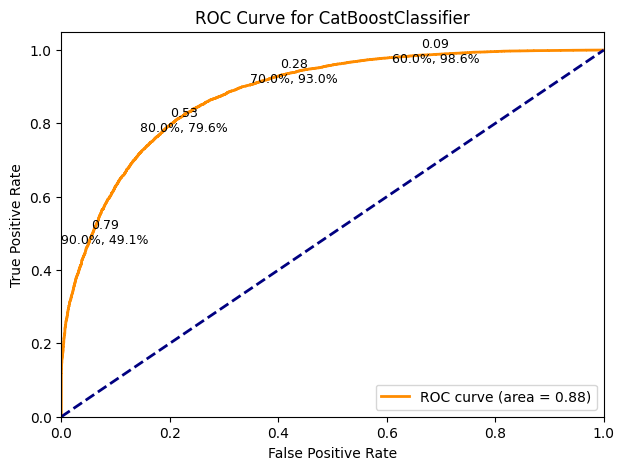

Optimal threshold for at least 70% precision: 0.2812371482799095
CatBoostClassifier - F1 Score: 79.89%, Precision: 70.0%, Recall: 93.04%, Training time: 4.18s

Model: CatBoostClassifier
  F1 Score: 79.890
  Precision: 70.000
  Recall: 93.040



In [83]:
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score, roc_curve
scaler = StandardScaler()

def evaluate_model(model, name, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    
    # Predict probabilities on the test set
    y_test_probabilities = model.predict_proba(X_test)[:, 1]
    roc(y_test, y_test_probabilities, name)
    # Calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_probabilities)
    
    # Filter out the thresholds where the precision is below 70%
    high_precision_indices = precision >= 0.7
    
    # We want to maximize recall, so we find the highest threshold that gives us at least 70% precision
    # This means we want the smallest threshold that is still greater or equal to 70% precision
    # This will be the first True in the high_precision_indices array
    max_recall_threshold_index = np.argmax(high_precision_indices)
    
    # Ensure we do not exceed the length of thresholds array
    optimal_threshold = thresholds[max_recall_threshold_index] if max_recall_threshold_index < len(thresholds) else 1.0
    
    print(f'Optimal threshold for at least 70% precision: {optimal_threshold}')

    # Apply the optimal threshold to get binary predictions on the test set
    y_test_pred = (y_test_probabilities >= optimal_threshold).astype(int)
    # Evaluate performance
    f1 = round(f1_score(y_test, y_test_pred) * 100, 2)
    precision = round(precision_score(y_test, y_test_pred) * 100, 2)
    recall = round(recall_score(y_test, y_test_pred) * 100, 2)
    
    print(f"{name} - F1 Score: {f1}%, Precision: {precision}%, Recall: {recall}%, Training time: {round(time.time() - start, 2)}s")
    
    return f1, precision, recall



models = {
    "CatBoostClassifier": CatBoostClassifier(silent=True, random_seed=42, iterations=600),
    # "AdaBoostClassifier": AdaBoostClassifier(n_estimators=600, learning_rate=0.9),
    # "RandomForestClassifier": RandomForestClassifier(n_estimators=1100,max_depth=11,max_features='sqrt', random_state=42),
    # "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators=225, learning_rate=0.04, max_depth=8,max_features='sqrt',subsample=0.90),
    # "ExtraTreesClassifier": ExtraTreesClassifier(n_estimators=850, max_depth=12, max_features='sqrt', bootstrap=True),

    # "SVC": SVC(),
    # "MLPClassifier": MLPClassifier(hidden_layer_sizes=(90), random_state=42),
    
    # "LGBMClassifier": LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1, verbose=-1),
    # "LogisticRegression": LogisticRegression(max_iter=1000),
    # "KNeighborsClassifier": KNeighborsClassifier(),
    # "GaussianNB": GaussianNB(),
    # "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
}

results = {name: evaluate_model(model, name, training_data[sorted_importance[:NUMBER_FEATURES].Feature], 
              test_data[sorted_importance[:NUMBER_FEATURES].Feature], 
              training_labels.values.ravel(), test_labels.values.ravel()) 
           for name, model in models.items()}

sorted_results = dict(sorted(results.items(), key=lambda item: item[1][0], reverse=True))  # Sorting based on F1 score

print()
# Printing the results
for name, metrics in sorted_results.items():
    f1, precision, recall = metrics
    print(f"Model: {name}\n  F1 Score: {f1:.3f}\n  Precision: {precision:.3f}\n  Recall: {recall:.3f}\n")